In [ ]:
Team ID = 05
Sem = IV 
Div = D1
Dept = Computer Science Engineering

Project Details: 
    ID = 
    Title = 
    Target : Metastatic diagnosis period 

Team Details:
    |Name                 |USN          |Roll No's|
    |Veerraj Chitragar(C) |01FE22BCS164 |427      |
    |Vrushali Bargur      |01FE22BCS162 |426      |
    |Drushti G. Pawar     |01FE22BCS177 |429      |
    |Avinash Nayak        |01FE22BCS204 |427      |

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
data=pd.read_csv("train_n.csv")
test=pd.read_csv("test.csv")

In [19]:
data.head(5)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286


In [20]:
test.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,F,27.07,...,47.57,53.50,71.31,75.20,76.96,75.78,74.87,61.06,44.31,42.83
4,208382,Asian,NaN,WA,980,West,Pacific,62,F,NaN,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [21]:
data.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
count,13173.000000,13173.000000,13173.000000,4102.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,...,13173.000000,13173.000000,13164.000000,13127.000000,13157.000000,13166.000000,13166.000000,13161.000000,13140.000000,13173.000000
mean,555441.784939,568.530859,59.271313,29.168808,20651.373928,1776.872376,40.542676,11.104988,12.857587,13.297375,...,52.411982,67.932236,73.074635,77.120929,76.281156,71.417027,59.323286,46.100150,42.096213,96.515221
std,259476.503094,275.758485,13.218883,5.752820,13840.379638,3876.061897,4.031027,1.511534,1.952248,3.390472,...,11.069900,6.301740,6.581630,5.335091,5.282156,6.502875,9.261934,12.245594,11.209011,108.969873
min,100043.000000,100.000000,18.000000,15.000000,635.550000,0.920000,20.600000,0.000000,6.310000,5.930000,...,28.790000,45.880000,53.460000,58.540000,56.200000,51.830000,37.540000,19.150000,15.380000,0.000000
25%,335100.000000,330.000000,50.000000,24.825000,9160.340000,163.150000,37.190000,10.150000,11.650000,11.000000,...,42.900000,63.220000,68.050000,73.170000,72.550000,67.020000,51.970000,35.560000,33.370000,3.000000
50%,555769.000000,557.000000,59.000000,28.580000,18952.780000,700.340000,40.640000,11.000000,12.900000,12.530000,...,50.290000,66.120000,71.640000,76.650000,76.080000,70.880000,57.450000,42.430000,38.500000,44.000000
75%,780967.000000,832.000000,67.000000,33.000000,30021.280000,1666.520000,42.940000,12.140000,13.910000,14.970000,...,62.220000,72.590000,77.660000,80.290000,79.130000,75.640000,67.360000,55.730000,50.500000,181.000000
max,999982.000000,995.000000,91.000000,97.000000,71374.130000,29851.690000,54.570000,17.680000,35.300000,62.100000,...,76.490000,86.570000,90.660000,96.430000,95.770000,89.190000,81.460000,76.300000,73.540000,365.000000


In [22]:
col = data.columns
print("for train data\n")
for i in col:
    missing_percentage = (data[i].isna().sum() * 100) / len(data[i])
    print(f"Column {i} has {missing_percentage}% missing values")


print("for test data\n")
col = test.columns

for i in col:
    missing_percentage = (test[i].isna().sum() * 100) / len(test[i])
    print(f"Column {i} has {missing_percentage}% missing values")


for train data

Column patient_id has 0.0% missing values
Column patient_race has 50.53518560692325% missing values
Column payer_type has 13.398618386092766% missing values
Column patient_state has 0.0% missing values
Column patient_zip3 has 0.0% missing values
Column Region has 0.0% missing values
Column Division has 0.0% missing values
Column patient_age has 0.0% missing values
Column patient_gender has 0.0% missing values
Column bmi has 68.86054809079177% missing values
Column breast_cancer_diagnosis_code has 0.0% missing values
Column breast_cancer_diagnosis_desc has 0.0% missing values
Column metastatic_cancer_diagnosis_code has 0.0% missing values
Column metastatic_first_novel_treatment has 99.91649586274956% missing values
Column metastatic_first_novel_treatment_type has 99.91649586274956% missing values
Column population has 0.0% missing values
Column density has 0.0% missing values
Column age_median has 0.0% missing values
Column age_under_10 has 0.0% missing values
Column age

In [23]:
data.replace('NA',np.nan,inplace=True)
test.replace('NA',np.nan,inplace=True)

In [24]:
for i in col:
    if((data[i].isna().sum() ) / len(data[i])>0.2):
        print(i)
        print("")

for i in col:
    if((test[i].isna().sum() ) / len(test[i])>0.2):
        print(i)
        print("")
    

patient_race

bmi

metastatic_first_novel_treatment

metastatic_first_novel_treatment_type

patient_race

bmi

metastatic_first_novel_treatment

metastatic_first_novel_treatment_type



In [25]:
to_drop=['age_under_10','age_10_to_19','age_20s','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type']
for i in to_drop:
  del data[i]
  del test[i] 

In [26]:
age_replace = {
    range(18, 35): 20.2,
    range(35, 45): 21.45,
    range(45, 50): 22.95,
    range(50, 55): 24.45,
    range(55, 65): 25.45,
    range(65, 75): 26.45,
    range(75, 100): 26.95
}

def replace_bmi(row):
    age = row['patient_age']
    bmi = row['bmi']
    if pd.isna(bmi) and not pd.isna(age):
        for age_range, age_replacement in age_replace.items():
            if age_range.start <= age < age_range.stop:
                return age_replacement  # Replace BMI based on age range
    return bmi


data['bmi'] = data.apply(replace_bmi, axis=1)
test['bmi']=test.apply(replace_bmi, axis=1)

In [27]:
print(data.shape)
print(test.shape)

(13173, 147)
(5646, 146)


In [28]:
tp = data.dtypes
catvalue = tp[tp == 'object'].index.tolist()
numvalue = tp[tp != 'object'].index.tolist()
print('categorical features:',catvalue)
print("\n")
print('\nNumerical features:\n',numvalue)

tp = test.dtypes
testcatvalue = tp[tp == 'object'].index.tolist()
testnumvalue = tp[tp != 'object'].index.tolist()
print('test categorical features:',testcatvalue)
print("\n")
print('\ntest Numerical features:',testnumvalue)

categorical features: ['patient_race', 'payer_type', 'patient_state', 'Region', 'Division', 'patient_gender', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code']



Numerical features:
 ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_le

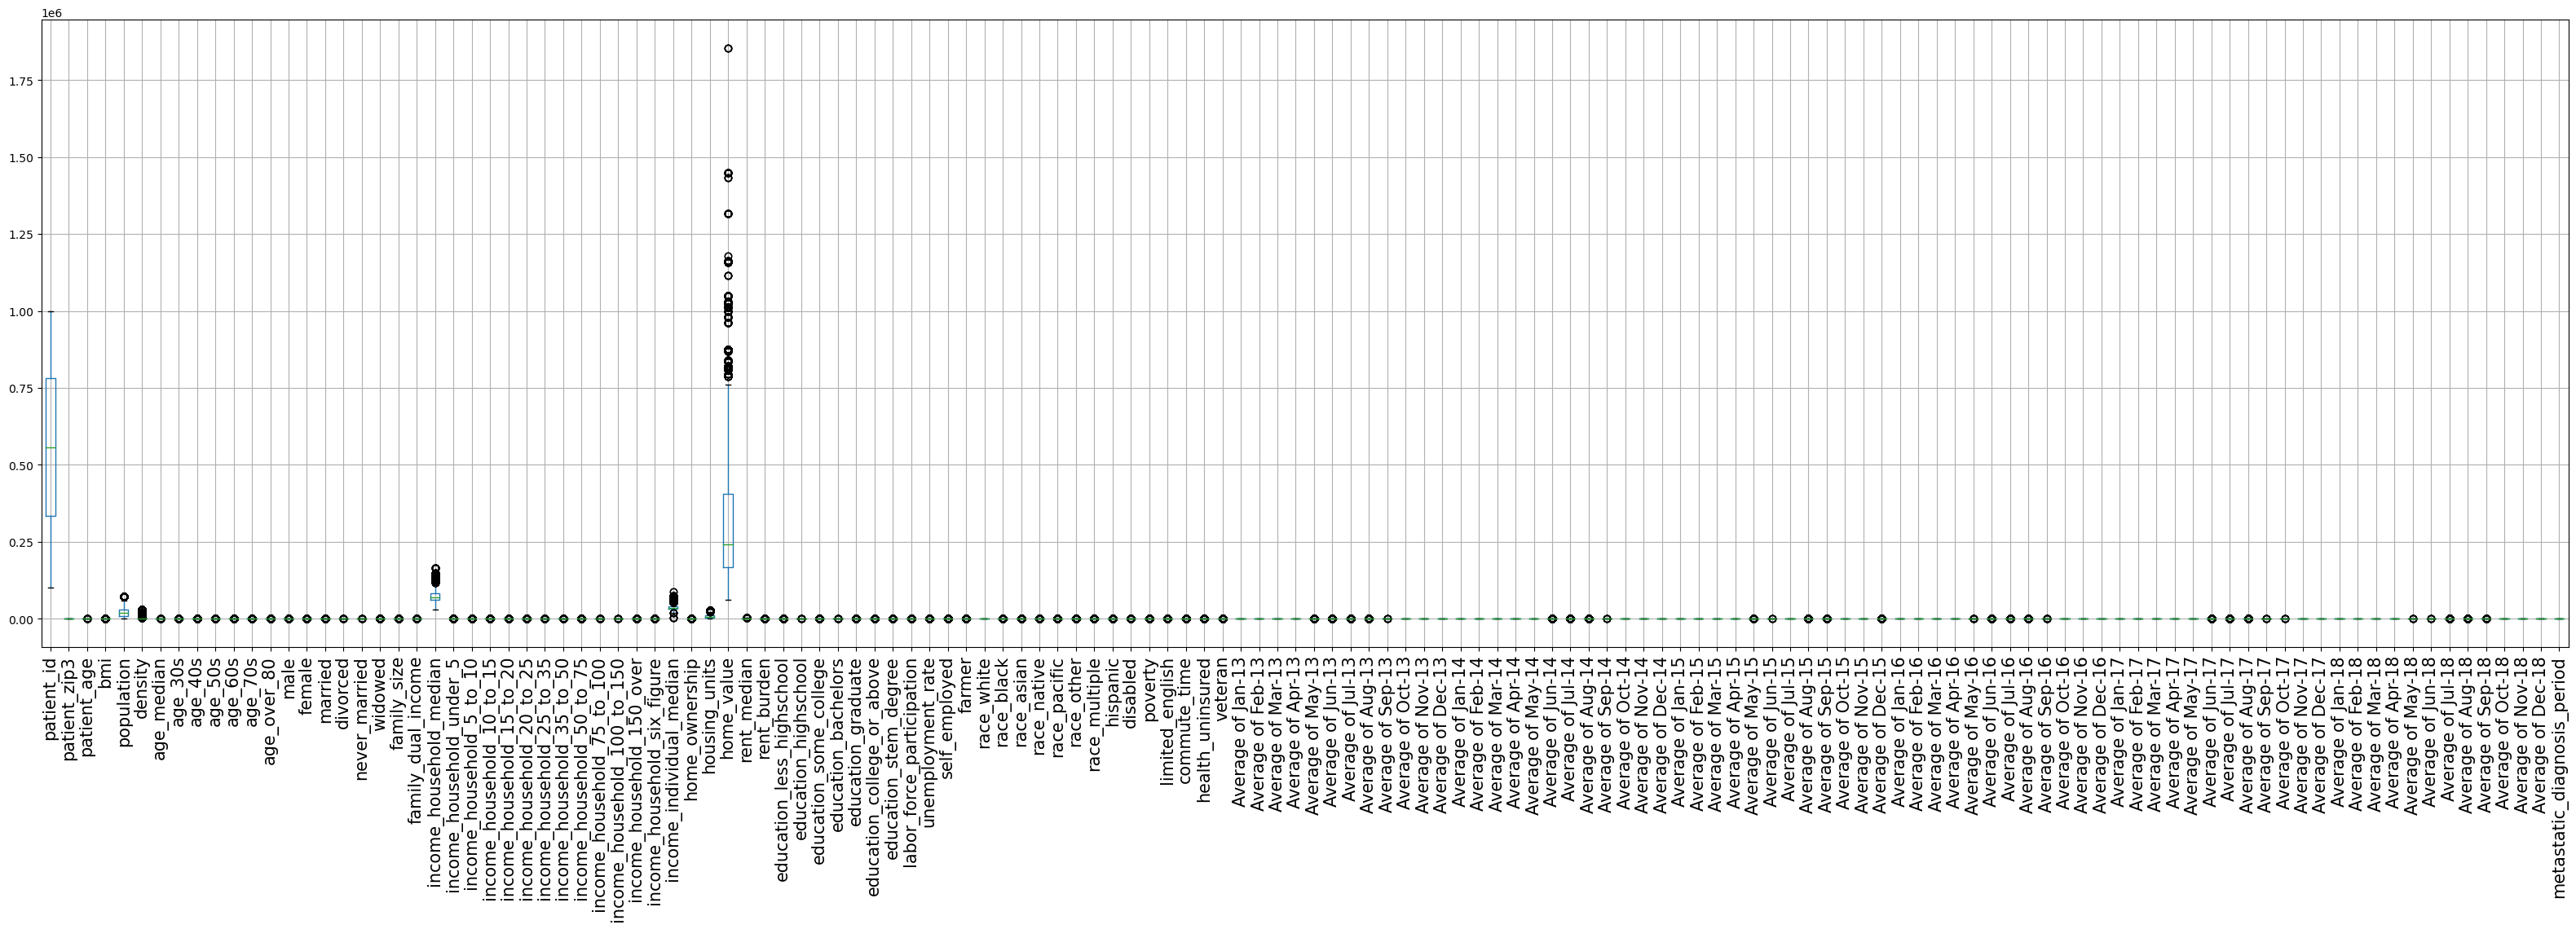

In [29]:
#outliers
plt.figure(figsize=(40, 10)) 
data[numvalue].boxplot()
plt.xticks(rotation=90,size=15)
plt.show()

In [30]:
'''for i in numvalue:
    data[i].replace(np.nan,data[i].mean(),inplace=True)
    
for i in catvalue:
    data[i].replace(np.nan,data[i].mode()[0],inplace=True)'''





# Forward-fill missing values
data[numvalue] = data[numvalue].ffill()

# Fill remaining NaNs with the column median
data[numvalue] = data[numvalue].fillna(data[numvalue].median())



# Forward-fill missing values
test[testnumvalue] = test[testnumvalue].ffill()

# Fill remaining NaNs with the column median
test[testnumvalue] = test[testnumvalue].fillna(test[testnumvalue].median())


#for i in catvalue:
 #   data[i].replace(np.nan,data[i].mode()[0],inplace=True)


In [31]:
data[numvalue].isnull().sum()

patient_id                     0
patient_zip3                   0
patient_age                    0
bmi                            0
population                     0
                              ..
Average of Sep-18              0
Average of Oct-18              0
Average of Nov-18              0
Average of Dec-18              0
metastatic_diagnosis_period    0
Length: 138, dtype: int64

In [32]:
print(data[catvalue].isnull().sum())

patient_race                        6657
payer_type                          1765
patient_state                          0
Region                                 0
Division                               0
patient_gender                         0
breast_cancer_diagnosis_code           0
breast_cancer_diagnosis_desc           0
metastatic_cancer_diagnosis_code       0
dtype: int64


In [33]:
data.shape

(13173, 147)

In [34]:
threshold = 3
for i in numvalue:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data[i] < (Q1 - threshold * IQR)) | (data[i] > (Q3 + threshold * IQR))
    outliers_count = outliers.sum()
    print("Outliers count per column:")
    print(outliers_count)

Outliers count per column:
0
Outliers count per column:
0
Outliers count per column:
0
Outliers count per column:
761
Outliers count per column:
0
Outliers count per column:
733
Outliers count per column:
0
Outliers count per column:
16
Outliers count per column:
12
Outliers count per column:
8
Outliers count per column:
8
Outliers count per column:
1
Outliers count per column:
114
Outliers count per column:
146
Outliers count per column:
146
Outliers count per column:
5
Outliers count per column:
5
Outliers count per column:
5
Outliers count per column:
35
Outliers count per column:
0
Outliers count per column:
4
Outliers count per column:
29
Outliers count per column:
30
Outliers count per column:
40
Outliers count per column:
6
Outliers count per column:
17
Outliers count per column:
7
Outliers count per column:
2
Outliers count per column:
5
Outliers count per column:
2
Outliers count per column:
2
Outliers count per column:
0
Outliers count per column:
0
Outliers count per column:

In [35]:
''''
for i in numvalue:
    mean = data[i].mean()
    std = data[i].std()
    outlier_idx = data.index[(np.abs((data[i] - mean) / std) > threshold)]
    data.loc[outlier_idx, i] = data[i].median()

data.reset_index(drop=True, inplace=True)   ''''       

SyntaxError: unterminated string literal (detected at line 8) (1510036640.py, line 8)

In [36]:
'''


# Function to replace outliers with NaN and then interpolate
def replace_outliers_with_interpolation(df, column, threshold=3):
    # Calculate the mean and standard deviation
    mean = df[column].mean()
    std = df[column].std()

    # Define the upper and lower bounds for outliers
    upper_bound = mean + threshold * std
    lower_bound = mean - threshold * std

    # Identify outliers and replace them with NaN
    df[column] = np.where((df[column] > upper_bound) | (df[column] < lower_bound), np.nan, df[column])

    # Interpolate to fill NaN values
    df[column] = df[column].interpolate()

# Apply the function to each column
for col in data.columns:
    replace_outliers_with_interpolation(data, col)'''




'\n\n\n# Function to replace outliers with NaN and then interpolate\ndef replace_outliers_with_interpolation(df, column, threshold=3):\n    # Calculate the mean and standard deviation\n    mean = df[column].mean()\n    std = df[column].std()\n\n    # Define the upper and lower bounds for outliers\n    upper_bound = mean + threshold * std\n    lower_bound = mean - threshold * std\n\n    # Identify outliers and replace them with NaN\n    df[column] = np.where((df[column] > upper_bound) | (df[column] < lower_bound), np.nan, df[column])\n\n    # Interpolate to fill NaN values\n    df[column] = df[column].interpolate()\n\n# Apply the function to each column\nfor col in data.columns:\n    replace_outliers_with_interpolation(data, col)'

In [37]:
threshold = 3
for i in numvalue:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (data[i] < (Q1 - threshold * IQR)) | (data[i] > (Q3 + threshold * IQR))
    outliers_count = outliers.sum()
    print("Outliers count per column:")
    print(outliers_count)

Outliers count per column:
0
Outliers count per column:
0
Outliers count per column:
0
Outliers count per column:
761
Outliers count per column:
0
Outliers count per column:
733
Outliers count per column:
0
Outliers count per column:
16
Outliers count per column:
12
Outliers count per column:
8
Outliers count per column:
8
Outliers count per column:
1
Outliers count per column:
114
Outliers count per column:
146
Outliers count per column:
146
Outliers count per column:
5
Outliers count per column:
5
Outliers count per column:
5
Outliers count per column:
35
Outliers count per column:
0
Outliers count per column:
4
Outliers count per column:
29
Outliers count per column:
30
Outliers count per column:
40
Outliers count per column:
6
Outliers count per column:
17
Outliers count per column:
7
Outliers count per column:
2
Outliers count per column:
5
Outliers count per column:
2
Outliers count per column:
2
Outliers count per column:
0
Outliers count per column:
0
Outliers count per column:

In [38]:
'''threshold=3
for i in numvalue:
    mean = data[i].mean()
    std = data[i].std()
    outlier_idx = data.index[(np.abs((data[i] - mean) / std) > threshold)]
    data = data.drop(outlier_idx)

data.reset_index(drop=True, inplace=True)'''

'threshold=3\nfor i in numvalue:\n    mean = data[i].mean()\n    std = data[i].std()\n    outlier_idx = data.index[(np.abs((data[i] - mean) / std) > threshold)]\n    data = data.drop(outlier_idx)\n\ndata.reset_index(drop=True, inplace=True)'

In [39]:
data.shape

(13173, 147)

(10.0, 100.0)

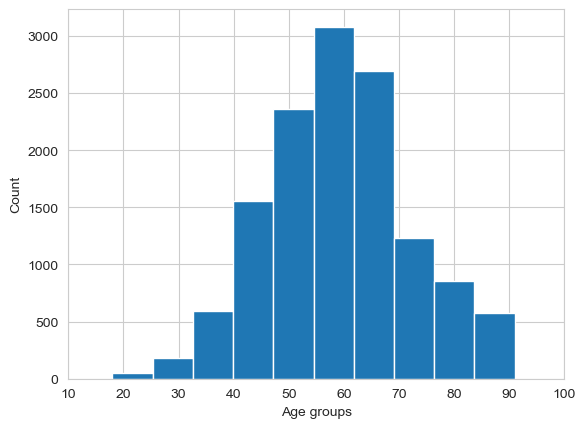

In [40]:
# What is the prevalence of breast cancer among different age groups ?
sns.set_style("whitegrid")
plt.hist(data['patient_age'],bins=10)
plt.show
plt.xlabel("Age groups")
plt.ylabel("Count")
plt.xlim(10,100)

As age increases chance of mutations are more thus we see more number of patients in the range of 50-70.
But it is less in the range of 70-90 as survival rate is less.

<function matplotlib.pyplot.show(close=None, block=None)>

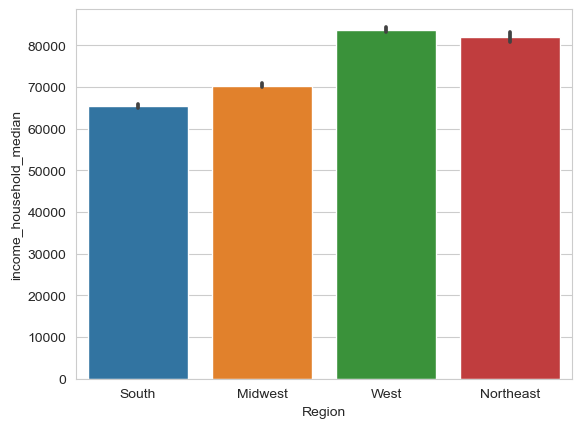

In [41]:
#What is the median household income across different regions and divisions?
sns.barplot(x='Region',y='income_household_median',data=data)
plt.show

By the above graph we can infer that west region has more income household median because of tech industry presence and diverse economies like entertainment industry , tourism etc.

In [42]:
#How do seasonal variations affect healthcare diagnosis rates?
'''df=pd.DataFrame()
df['Winter'] = data[['Average of Jan-18', 'Average of Feb-18', 'Average of Dec-17']].mean(axis=1)
df['Spring'] = data[['Average of Mar-18', 'Average of Apr-18', 'Average of May-18']].mean(axis=1)
df['Summer'] = data[['Average of Jun-18', 'Average of Jul-18', 'Average of Aug-18']].mean(axis=1)
df['Autumn'] = data[['Average of Sep-18', 'Average of Oct-18', 'Average of Nov-18']].mean(axis=1)

plt.bar(x=data['Average of Jan-18'],y=data['metastatic_diagnosis_period'],data=data)
plt.show'''

"df=pd.DataFrame()\ndf['Winter'] = data[['Average of Jan-18', 'Average of Feb-18', 'Average of Dec-17']].mean(axis=1)\ndf['Spring'] = data[['Average of Mar-18', 'Average of Apr-18', 'Average of May-18']].mean(axis=1)\ndf['Summer'] = data[['Average of Jun-18', 'Average of Jul-18', 'Average of Aug-18']].mean(axis=1)\ndf['Autumn'] = data[['Average of Sep-18', 'Average of Oct-18', 'Average of Nov-18']].mean(axis=1)\n\nplt.bar(x=data['Average of Jan-18'],y=data['metastatic_diagnosis_period'],data=data)\nplt.show"

(10.0, 365.0)

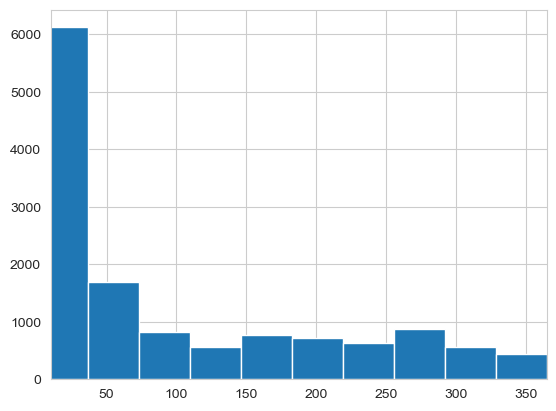

In [43]:
#What is the average period from initial diagnosis to metastatic cancer diagnosis
#for patients in the dataset?

plt.hist(data['metastatic_diagnosis_period'],bins=10)
plt.show
plt.xlim(10,365)

<function matplotlib.pyplot.show(close=None, block=None)>

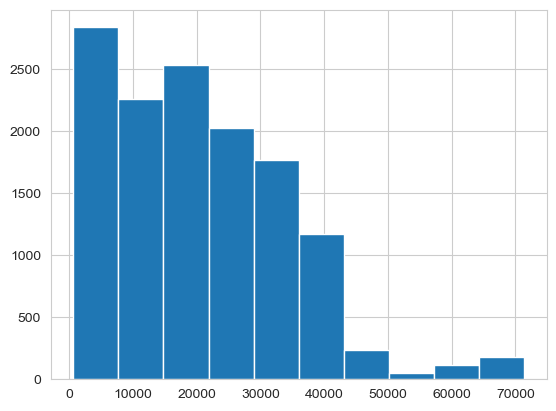

In [44]:
plt.hist(data['population'],bins=10)
plt.show
#plt.xlim(10,20)

By the above graph we can say that around 6000 people got detected with metastatic cancer in 50 days.

<Axes: >

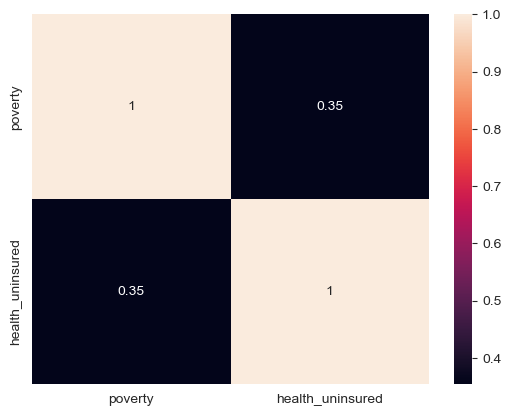

In [45]:
#How does poverty level correlate with health insurance coverage?
nv=['poverty','health_uninsured']

sns.heatmap(data[nv].corr(),annot=True)

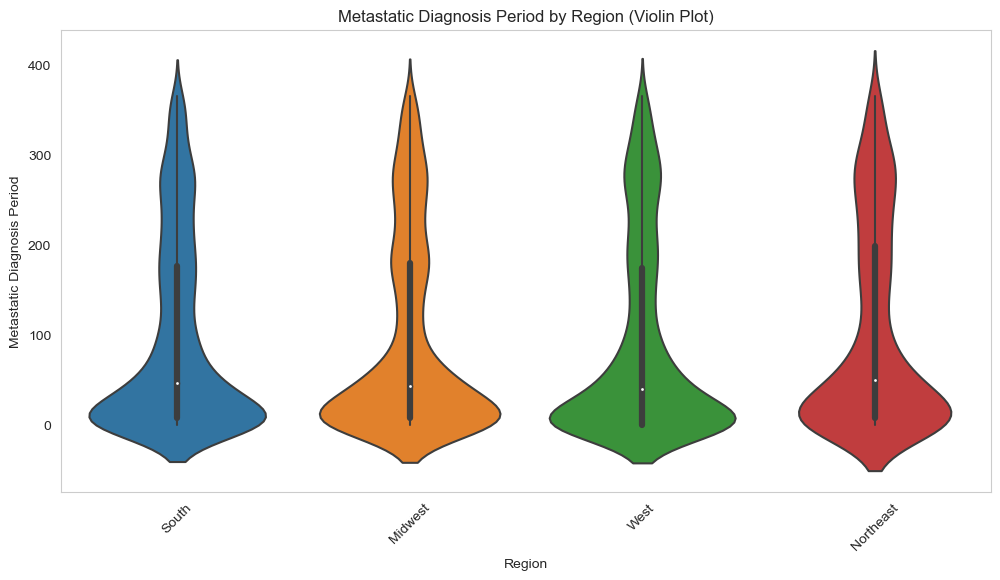

In [46]:
#Are there any regions or divisions with notably shorter or longer metastatic diagnosis periods? 
#What might contribute to these regional differences?
plt.figure(figsize=(12, 6))
sns.violinplot(x='Region', y='metastatic_diagnosis_period', data=data)
plt.title('Metastatic Diagnosis Period by Region (Violin Plot)')
plt.xlabel('Region')
plt.ylabel('Metastatic Diagnosis Period')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [47]:
months = [
    'Average of Jan-13', 'Average of Feb-13', 'Average of Mar-13',
    'Average of Apr-13', 'Average of May-13', 'Average of Jun-13',
    'Average of Jul-13', 'Average of Aug-13', 'Average of Sep-13',
    'Average of Oct-13', 'Average of Nov-13', 'Average of Dec-13'
]
data['Std_Dev_of_2013'] = data[months].std(axis=1)
test['Std_Dev_of_2013'] = test[months].std(axis=1)
#print(data)


# Drop the columns representing January 2018 to December 2018
data = data.drop(columns=months)
data.columns
test = test.drop(columns=months)
test.columns

C:\Users\avina\AppData\Local\Temp\ipykernel_6440\3531119010.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Std_Dev_of_2013'] = data[months].std(axis=1)
C:\Users\avina\AppData\Local\Temp\ipykernel_6440\3531119010.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['Std_Dev_of_2013'] = test[months].std(axis=1)


Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi',
       ...
       'Average of Apr-18', 'Average of May-18', 'Average of Jun-18',
       'Average of Jul-18', 'Average of Aug-18', 'Average of Sep-18',
       'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18',
       'Std_Dev_of_2013'],
      dtype='object', length=135)

In [48]:
months = [
    'Average of Jan-14', 'Average of Feb-14', 'Average of Mar-14',
    'Average of Apr-14', 'Average of May-14', 'Average of Jun-14',
    'Average of Jul-14', 'Average of Aug-14', 'Average of Sep-14',
    'Average of Oct-14', 'Average of Nov-14', 'Average of Dec-14'
]
data['Std_Dev_of_2014'] = data[months].std(axis=1)
test['Std_Dev_of_2014'] = test[months].std(axis=1)
#print(data)


# Drop the columns representing January 2018 to December 2018
data = data.drop(columns=months)
data.columns
test = test.drop(columns=months)
test.columns

C:\Users\avina\AppData\Local\Temp\ipykernel_6440\856443146.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Std_Dev_of_2014'] = data[months].std(axis=1)
C:\Users\avina\AppData\Local\Temp\ipykernel_6440\856443146.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['Std_Dev_of_2014'] = test[months].std(axis=1)


Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi',
       ...
       'Average of May-18', 'Average of Jun-18', 'Average of Jul-18',
       'Average of Aug-18', 'Average of Sep-18', 'Average of Oct-18',
       'Average of Nov-18', 'Average of Dec-18', 'Std_Dev_of_2013',
       'Std_Dev_of_2014'],
      dtype='object', length=124)

In [49]:
months = [
    'Average of Jan-15', 'Average of Feb-15', 'Average of Mar-15',
    'Average of Apr-15', 'Average of May-15', 'Average of Jun-15',
    'Average of Jul-15', 'Average of Aug-15', 'Average of Sep-15',
    'Average of Oct-15', 'Average of Nov-15', 'Average of Dec-15'
]
data['Std_Dev_of_2015'] = data[months].std(axis=1)
test['Std_Dev_of_2015'] = test[months].std(axis=1)
#print(data)


# Drop the columns representing January 2018 to December 2018
data = data.drop(columns=months)
data.columns
test = test.drop(columns=months)
test.columns

C:\Users\avina\AppData\Local\Temp\ipykernel_6440\119626638.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Std_Dev_of_2015'] = data[months].std(axis=1)
C:\Users\avina\AppData\Local\Temp\ipykernel_6440\119626638.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['Std_Dev_of_2015'] = test[months].std(axis=1)


Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi',
       ...
       'Average of Jun-18', 'Average of Jul-18', 'Average of Aug-18',
       'Average of Sep-18', 'Average of Oct-18', 'Average of Nov-18',
       'Average of Dec-18', 'Std_Dev_of_2013', 'Std_Dev_of_2014',
       'Std_Dev_of_2015'],
      dtype='object', length=113)

In [50]:
months = [
    'Average of Jan-16', 'Average of Feb-16', 'Average of Mar-16',
    'Average of Apr-16', 'Average of May-16', 'Average of Jun-16',
    'Average of Jul-16', 'Average of Aug-16', 'Average of Sep-16',
    'Average of Oct-16', 'Average of Nov-16', 'Average of Dec-16'
]
data['Std_Dev_of_2016'] = data[months].std(axis=1)
test['Std_Dev_of_2016'] = test[months].std(axis=1)
#print(data)


# Drop the columns representing January 2018 to December 2018
data = data.drop(columns=months)
data.columns
test = test.drop(columns=months)
test.columns

C:\Users\avina\AppData\Local\Temp\ipykernel_6440\3854919515.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Std_Dev_of_2016'] = data[months].std(axis=1)
C:\Users\avina\AppData\Local\Temp\ipykernel_6440\3854919515.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['Std_Dev_of_2016'] = test[months].std(axis=1)


Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi',
       ...
       'Average of Jul-18', 'Average of Aug-18', 'Average of Sep-18',
       'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18',
       'Std_Dev_of_2013', 'Std_Dev_of_2014', 'Std_Dev_of_2015',
       'Std_Dev_of_2016'],
      dtype='object', length=102)

In [51]:
months = [
    'Average of Jan-17', 'Average of Feb-17', 'Average of Mar-17',
    'Average of Apr-17', 'Average of May-17', 'Average of Jun-17',
    'Average of Jul-17', 'Average of Aug-17', 'Average of Sep-17',
    'Average of Oct-17', 'Average of Nov-17', 'Average of Dec-17'
]
data['Std_Dev_of_2017'] = data[months].std(axis=1)
test['Std_Dev_of_2017'] = test[months].std(axis=1)
#print(data)


# Drop the columns representing January 2018 to December 2018
data = data.drop(columns=months)
data.columns
test = test.drop(columns=months)
test.columns

C:\Users\avina\AppData\Local\Temp\ipykernel_6440\3845425588.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Std_Dev_of_2017'] = data[months].std(axis=1)


Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'population', 'density',
       'age_median', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 

In [52]:
months = [
    'Average of Jan-18', 'Average of Feb-18', 'Average of Mar-18',
    'Average of Apr-18', 'Average of May-18', 'Average of Jun-18',
    'Average of Jul-18', 'Average of Aug-18', 'Average of Sep-18',
    'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18'
]
data['Std_Dev_of_2018'] = data[months].std(axis=1)
test['Std_Dev_of_2018'] = test[months].std(axis=1)
#print(data)


# Drop the columns representing January 2018 to December 2018
data = data.drop(columns=months)
data.columns
test = test.drop(columns=months)
test.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'population', 'density',
       'age_median', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 

In [53]:
data.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi', 'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'population', 'density',
       'age_median', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s',
       'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married',
       'widowed', 'family_size', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'home_ownership', 'housing_units', 

In [54]:
data['patient_gender'].unique()
print(test['patient_gender'].unique())

['F']


In [55]:
del data['patient_gender']
del test['patient_gender']

In [56]:
del data['breast_cancer_diagnosis_desc']
del test['breast_cancer_diagnosis_desc']

In [57]:
print(data['payer_type'].unique())
print(test['payer_type'].unique())

['COMMERCIAL' nan 'MEDICAID' 'MEDICARE ADVANTAGE']
['COMMERCIAL' nan 'MEDICARE ADVANTAGE' 'MEDICAID']


In [58]:
del data['male'] 
del data['female']
del data['never_married']
del data['divorced']
del data['family_size']
del data['married']
del data['limited_english']
del data['widowed']

del test['male'] 
del test['female']
del test['never_married']
del test['divorced']
del test['family_size']
del test['married']
del test['limited_english']
del test['widowed']
#male', 'female', 'married',
       #'divorced', 'never_married', 'widowed', 'family_size',

In [59]:
del data['housing_units']
del test['housing_units']

In [60]:
del data['home_ownership']
del test['home_ownership']

In [61]:
del data['home_value']
del test['home_value']

In [62]:
del data['rent_median']
del test['rent_median']

In [63]:
import pandas as pd



# Define a function to determine the race based on the provided criteria
def determine_race(row):
    if row['race_multiple'] > max(row['race_white'], row['race_black'], row['race_asian'], row['race_native'], row['race_pacific'], row['race_other']):
        return 'Missing'
    if row['race_native'] > max(row['race_white'], row['race_black'], row['race_asian'], row['race_pacific'], row['race_other']):
        return 'Native'
    if row['race_pacific'] > max(row['race_white'], row['race_black'], row['race_asian'], row['race_native'], row['race_other']):
        return 'Pacific'
    if row['hispanic'] > max(row['race_white'], row['race_black'], row['race_asian'], row['race_native'], row['race_pacific'], row['race_other']):
        return 'Hispanic'
    if row['race_white'] > max(row['race_black'], row['race_asian'], row['race_native'], row['race_pacific'], row['race_other']):
        return 'White'
    if row['race_black'] > max(row['race_white'], row['race_asian'], row['race_native'], row['race_pacific'], row['race_other']):
        return 'Black'
    if row['race_asian'] > max(row['race_white'], row['race_black'], row['race_native'], row['race_pacific'], row['race_other']):
        return 'Asian'
    return 'Other'

# Apply the function to fill in the patient_race column
data['patient_race'] = data.apply(determine_race, axis=1)
test['patient_race'] = test.apply(determine_race, axis=1)

In [64]:
print(data['patient_race'].isna().sum())
print(test['patient_race'].isna().sum())

0
0


In [65]:
del data['race_white']
del data['race_black']
del data['race_asian']
del data['race_native']
del data['race_pacific']
del data['race_other']
del data['race_multiple']
del data['hispanic']

del test['race_white']
del test['race_black']
del test['race_asian']
del test['race_native']
del test['race_pacific']
del test['race_other']
del test['race_multiple']
del test['hispanic']

In [66]:
data['payer_type'].value_counts()
test['payer_type'].value_counts()

payer_type
COMMERCIAL            2596
MEDICAID              1202
MEDICARE ADVANTAGE    1063
Name: count, dtype: int64

In [67]:
del data['veteran']
del test['veteran']

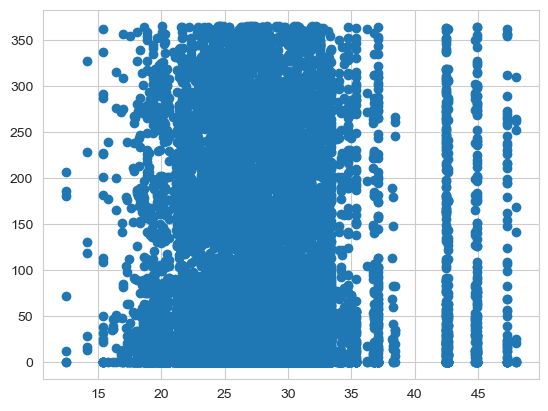

In [68]:
import seaborn as sns
plt.scatter(data['commute_time'],data['metastatic_diagnosis_period'])

In [69]:
del data['commute_time']
del test['commute_time']

In [70]:
print(data.describe())
print("---------------------------------------------------------------------")
print(test.describe())

          patient_id  patient_zip3   patient_age           bmi    population  \
count   13173.000000  13173.000000  13173.000000  13173.000000  13173.000000   
mean   555441.784939    568.530859     59.271313     26.235322  20651.373928   
std    259476.503094    275.758485     13.218883      4.056634  13840.379638   
min    100043.000000    100.000000     18.000000     15.000000    635.550000   
25%    335100.000000    330.000000     50.000000     24.450000   9160.340000   
50%    555769.000000    557.000000     59.000000     25.450000  18952.780000   
75%    780967.000000    832.000000     67.000000     26.950000  30021.280000   
max    999982.000000    995.000000     91.000000     97.000000  71374.130000   

            density    age_median       age_30s       age_40s       age_50s  \
count  13173.000000  13173.000000  13173.000000  13173.000000  13173.000000   
mean    1776.872376     40.542676     12.893557     12.063957     13.458827   
std     3876.061897      4.031027      2.4

In [71]:
test.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'bmi',
       'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code',
       'population', 'density', 'age_median', 'age_30s', 'age_40s', 'age_50s',
       'age_60s', 'age_70s', 'age_over_80', 'family_dual_income',
       'income_household_median', 'income_household_under_5',
       'income_household_5_to_10', 'income_household_10_to_15',
       'income_household_15_to_20', 'income_household_20_to_25',
       'income_household_25_to_35', 'income_household_35_to_50',
       'income_household_50_to_75', 'income_household_75_to_100',
       'income_household_100_to_150', 'income_household_150_over',
       'income_household_six_figure', 'income_individual_median',
       'rent_burden', 'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_college_or_above', 

In [72]:
    

data['low_income'] = data[['income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 
                           'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 
                           'income_household_35_to_50']].max(axis=1)

data['high_income'] = data[['income_household_50_to_75', 'income_household_75_to_100', 
                            'income_household_100_to_150', 'income_household_150_over', 
                            'income_household_six_figure']].max(axis=1)


test['low_income'] = test[['income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 
                           'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 
                           'income_household_35_to_50']].max(axis=1)

test['high_income'] = test[['income_household_50_to_75', 'income_household_75_to_100', 
                            'income_household_100_to_150', 'income_household_150_over', 
                            'income_household_six_figure']].max(axis=1)

In [73]:
data['payer_type'].isna().sum()
print(test['payer_type'].isna().sum())

785


In [74]:
data.loc[data['payer_type'].isnull() & (data['patient_age'] >= 65) & (data['disabled'] >= 12.96), 'payer_type'] = 'MEDICARE ADVANTAGE'
data.loc[data['payer_type'].isnull() & (data['health_uninsured'] >= 7.36), 'payer_type'] = 'UNINSURED'
data.loc[data['payer_type'].isnull() & (data['low_income'] > data['high_income']), 'payer_type'] = 'MEDICAID'
data.loc[data['payer_type'].isnull(), 'payer_type'] = 'COMMERCIAL'     

test.loc[test['payer_type'].isnull() & (test['patient_age'] >= 65) & (test['disabled'] >= 12.96), 'payer_type'] = 'MEDICARE ADVANTAGE'
test.loc[test['payer_type'].isnull() & (test['health_uninsured'] >= 7.47), 'payer_type'] = 'UNINSURED'
test.loc[test['payer_type'].isnull() & (test['low_income'] > test['high_income']), 'payer_type'] = 'MEDICAID'
test.loc[test['payer_type'].isnull(), 'payer_type'] = 'COMMERCIAL'   
        

In [75]:
to_drop=['income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'health_uninsured',
 'poverty',
 'disabled']

for i in to_drop:
    del data[i]
    del test[i]

In [76]:
drop=['age_median', 'age_30s', 'age_40s', 'age_50s',
       'age_60s', 'age_70s', 'age_over_80','population','family_dual_income',
       'income_household_median', 'income_individual_median', 'rent_burden']
for i in drop:
    del data[i]
    del test[i]

In [77]:
data.shape

(13173, 32)

In [78]:
test.shape

(5646, 31)

In [79]:
data.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'bmi',
       'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code',
       'density', 'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_college_or_above', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'metastatic_diagnosis_period', 'Std_Dev_of_2013',
       'Std_Dev_of_2014', 'Std_Dev_of_2015', 'Std_Dev_of_2016',
       'Std_Dev_of_2017', 'Std_Dev_of_2018', 'low_income', 'high_income'],
      dtype='object')

In [80]:
test.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'bmi',
       'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code',
       'density', 'education_less_highschool', 'education_highschool',
       'education_some_college', 'education_bachelors', 'education_graduate',
       'education_college_or_above', 'education_stem_degree',
       'labor_force_participation', 'unemployment_rate', 'self_employed',
       'farmer', 'Std_Dev_of_2013', 'Std_Dev_of_2014', 'Std_Dev_of_2015',
       'Std_Dev_of_2016', 'Std_Dev_of_2017', 'Std_Dev_of_2018', 'low_income',
       'high_income'],
      dtype='object')

In [81]:
data.to_csv('train_preprocessed', index=False)
test.to_csv('test_preprocessed',index=False)